In [56]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [ ]:
# Define tiles with neighbor rules

TILES = {
    "grass": {
        "color": "green",
        "rules": {
            "up": {"grass", "road"},
            "down": {"grass", "road"},
            "left": {"grass", "road"},
            "right": {"grass", "road"}
        }
    },
    "road": {
        "color": "gray",
        "rules": {
            "up": {"road", "grass"},
            "down": {"road", "grass"},
            "left": {"road", "grass"},
            "right": {"road", "grass"}
        }
    },
    "water": {
        "color": "blue",
        "rules": {
            "up": {"water", "grass"},
            "down": {"water", "grass"},
            "left": {"water", "grass"},
            "right": {"water", "grass"}
        }
    },
    "wall": {
        "color": "black",
        "rules": {
            "up": {"wall", "road", "grass"},
            "down": {"wall", "grass"},
            "left": {"Wall", "grass"},
            "right": {"wall", "grass"}
        }
    }
}

In [58]:
class Cell:
    def __init__(self, options):
        self.collapsed = False
        self.options = options[:]

def create_grid(w, h, tile_names):
    return [[Cell(tile_names) for _ in range(w)] for _ in range(h)]

tile_names = list(TILES.keys())
GRID_W, GRID_H = 10, 10
grid = create_grid(GRID_W, GRID_H, tile_names)

In [59]:
def get_lowest_entropy_cell(grid):
    min_entropy = float('inf')
    canidates = []
    for y, row in enumerate(grid):
        for x, cell in enumerate(row):
            if not cell.collapsed:
                entropy = len(cell.options)
                if entropy < min_entropy:
                    min_entropy = entropy
                    canidates = [(x, y)]
                elif entropy == min_entropy:
                    canidates.append((x, y))
    return random.choice(canidates) if canidates else None

def collapse_cell(cell):
    cell.collapsed = True
    cell.options = [random.choice(cell.options)]

In [60]:
def get_neighbors(x, y, w, h):
    directions = {
        "up":    (0, -1),
        "down":  (0, 1),
        "left":  (-1, 0),
        "right": (1, 0)
    }
    for dir, (dx, dy) in directions.items():
        nx, ny = x + dx, y + dy
        if 0 <= nx < w and 0 <= ny < h:
            yield dir, nx, ny

In [61]:
def propagate(grid):
    w, h = len(grid[0]), len(grid)
    changed = True
    while changed:
        changed = False
        for y in range(h):
            for x in range(w):
                cell = grid[y][x]
                if not cell.collapsed:
                    continue
                tile_name = cell.options[0]
                rules = TILES[tile_name]["rules"]

                for dir, nx, ny in get_neighbors(x, y, w, h):
                    neighbor = grid[ny][nx]
                    if neighbor.collapsed:
                        continue
                    valid = rules[dir]
                    new_opts = [opt for opt in neighbor.options if opt in valid]
                    if set(new_opts) != set(neighbor.options):
                        neighbor.options = new_opts
                        changed = True
                        if len(new_opts) == 1:
                            collapse_cell(neighbor)

In [62]:
def step(grid):
    pos = get_lowest_entropy_cell(grid)
    if pos:
        x, y = pos
        collapse_cell(grid[y][x])
        propagate(grid)
        render(grid)
    else:
        print("Collapse Complete.")

def run_full_collapse(grid):
    while True:
        pos = get_lowest_entropy_cell(grid)
        if not pos:
            break
        x, y = pos
        collapse_cell(grid[y][x])
        propagate(grid)
    render(grid)

In [69]:
def is_fully_collpased(grid):
    for row in grid:
        for cell in row:
            if not cell.collapsed:
                return False
    return True

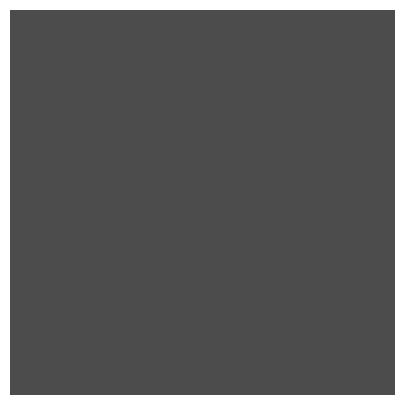

In [63]:
def render(grid):
    h, w = len(grid), len(grid[0])
    color_grid = np.zeros((h, w, 3))

    for y in range(h):
        for x in range(w):
            cell = grid[y][x]
            if cell.collapsed:
                tile = TILES[cell.options[0]]
                color = mcolors.to_rgb(tile["color"])
            else:
                color = (0.3, 0.3, 0.3)
            color_grid[y, x] = color



    plt.figure(figsize=(5, 5))
    plt.imshow(color_grid)
    plt.axis('off')
    plt.show()

render(grid)

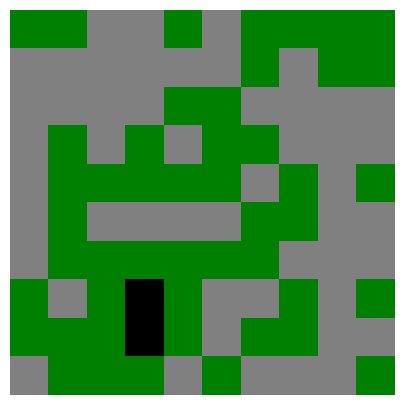

Grid fully collpased.


In [71]:
tile_names = list (TILES.keys())
GRID_W, GRID_H = 10, 10
grid = create_grid(GRID_W, GRID_H, tile_names)

run_full_collapse(grid)
if is_fully_collpased(grid):
    print("Grid fully collpased.")
else:
    print("Grid has uncollapsed cells.")